# 统计与大数据分析软件第五次作业

## 第一题

编写一个程序，在一个文件夹中，在其中生成`assignment_1.txt`, `assignment_2.txt`, ...., `assignment_100.txt`等100个文本文件，文件内容为这个文件的绝对路径。

然后随机删除其中5个文件。再编写另一个程序，找出缺失的5个文件，并把缺失的5个文件补齐。

首先，我们需要导入os库，处理文件读写：

In [20]:
import os

下一步新建文件夹，保存我们的文件：

In [21]:
folder_path = 'assignments'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

接下来进行循环，生成我们编写的文件：

In [22]:
for i in range(1, 101):
    file_name = f'assignment_{i}.txt'
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'w') as file:
        file.write(os.path.abspath(file_path))    

接下来随机删除和添加文件，先导入随机数的库：

In [23]:
import random

选择上面创建的结果，对其进行如下操作（删除，填充）：

In [24]:
# 删除文件，寻找路径和随机生成对应需要的文件
folder_path = 'assignments'
files = os.listdir(folder_path)
files_to_delete = random.sample(files, 5)

# 随机删除循环，并打印删除的文件名
for file in files_to_delete:
    print(f'File {file} destroyed.')
    file_path = os.path.join(folder_path, file)
    os.remove(file_path)    

File assignment_96.txt destroyed.
File assignment_44.txt destroyed.
File assignment_91.txt destroyed.
File assignment_74.txt destroyed.
File assignment_98.txt destroyed.


In [25]:
# 填充文件，获取已有的文件列表
folder_path = 'assignments'
existing_files = set(os.listdir(folder_path))

# 填充循环，并将文件路径写入文件，并打印文件恢复
for i in range(1, 101):
    file_name = f'assignment_{i}.txt'
    if file_name not in existing_files:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'w') as file:
            file.write(os.path.abspath(file_path))
        print(f'File {file_name} created.')    

File assignment_44.txt created.
File assignment_74.txt created.
File assignment_91.txt created.
File assignment_96.txt created.
File assignment_98.txt created.


## 第二题

使用`numpy.random.randn`分别创建$10*10$，$100*100$和$1000*1000$的数据，并分别计算他们的均值和标准差。

第一步，导入我们的`numpy`库函数

In [3]:
import numpy as np

生成三个随机数矩阵（方阵），大小分别为$10, 100, 1000$

In [22]:
ten_m = np.random.randn(10,10)
hun_m = np.random.randn(100,100)
thou_m = np.random.randn(1000,1000)

ten_m

array([[ 0.03493596, -0.96178923,  0.23282936,  0.36213764,  0.2479145 ,
        -2.09184409,  1.02628071, -2.38168256, -0.51468323,  0.05055239],
       [ 0.10178598, -2.5756002 ,  0.48449134,  0.06446737, -1.40917285,
         0.47635623,  1.64180404, -0.86347221,  1.3017808 ,  0.39866849],
       [ 1.86140763,  0.33038608,  0.28735865,  0.88008186,  0.18178539,
        -1.10499386, -2.17502436, -2.08262589,  0.71285098, -0.7054283 ],
       [ 1.18264268,  0.97669924,  0.92057001,  0.01376094,  0.44355674,
        -0.05156768,  1.07098266, -0.33299358, -0.59245978,  0.315512  ],
       [ 1.83014619,  0.08195879, -0.9182752 , -0.94762198,  0.53080785,
         0.84310021, -1.98456391, -0.63367777, -0.82581629,  0.79388838],
       [-1.43336471,  0.79166866,  1.858425  ,  0.09070661,  1.42313033,
        -0.03819906,  1.8269306 , -0.00470059,  1.35017814, -0.21271526],
       [-2.9320223 ,  0.2610375 , -0.76313265, -0.40883479,  0.11225025,
         0.57810033,  0.30418694,  0.47848473

接下来依次生成矩阵的均值和标准差：

In [6]:
ten_m.mean(), ten_m.std() # 10*10矩阵的均值和标准差

(-0.1120620078608245, 0.9128642372417183)

In [7]:
hun_m.mean(), hun_m.std() # 100*100矩阵的均值和标准差

(-0.007129593903455349, 1.0084522895807841)

In [8]:
thou_m.mean(), thou_m.std() # 1000*1000矩阵的均值和标准差

(0.000675902879076251, 1.0001893845697012)

In [21]:
ten_m.mean(0), ten_m.mean(1) # 求均值(对每一行和每一列求均值)，这里为了方便不对另外两个数组求某一维度的均值了

(array([ 0.29778735,  0.33302242,  0.11129109, -0.32981742, -0.21663701,
        -0.00197841, -0.12984826, -0.32448003, -0.31270207, -0.54725774]),
 array([-0.45884461, -0.32460114, -0.35643145, -0.41364134,  0.35005693,
        -0.16864611, -0.28174483, -0.01694848,  0.20873437,  0.34144657]))

## 第三题

给定一个一维数组，定义函数`moving_average(a,n)`计算此数组的滑动平均值，`a`为数组，`n`为窗口长度。给出例子并作图显示

我们继续导入`numpy`包和`matplotlib`包（作图）

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

定义函数`moving_average`，传入两个参数：

1. 一个一维数组

2. 滑动窗口的大小

返回一个一维数组，是原数组的滑动平均值。

In [ ]:
def moving_average(a, n):

    # 对第n个元素，将a[n-1]前n个进行求和，为后面计算滑动平均值数组做准备
    ret = np.cumsum(a, dtype=float)

    # 计算滑动平均值数组，排除多余相加的部分
    ret[n:] = ret[n:] - ret[:-n]

    # 最后求取平均值
    return ret[n - 1:] / n

建立一个示例程序，传入大小为100的数组，滑动窗口大小为5：

In [36]:
# 示例数组
a = np.random.randn(100)
n = 5

# 计算滑动平均值
ma = moving_average(a, n)

可视化我们的结果：

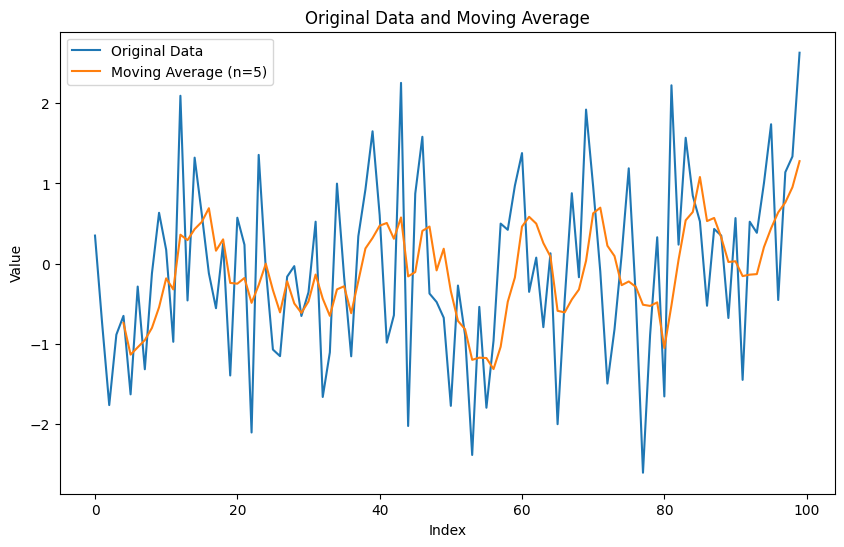

In [37]:
# 绘制原始数据和滑动平均值
plt.figure(figsize=(10, 6))
plt.plot(a, label='Original Data')
plt.plot(np.arange(n - 1, len(a)), ma, label=f'Moving Average (n={n})')
plt.title('Original Data and Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## 第四题

对于一个任意二维数组，给定此数组中某个元素的位置$(i,j)$和一个长度值$l$，

从此二维数组中提取出以此元素为中心，维数为$(2*l+1,2*l+1)$的方阵。

如果越界，则使用0补齐。

In [ ]:
# 传入参数数组，坐标（i，j），长度l
def extract_submatrix(arr, i, j, l):

    # 判断数组大小
    m = len(arr)
    if m == 0:
        return [[0] * (2 * l + 1) for _ in range(2 * l + 1)]
    n = len(arr[0]) if m > 0 else 0

    # 坐标变成数组的索引范围，传入的（i，j）是真是坐标而非数组索引
    i -= 1
    j -= 1

    # 计算子矩阵的大小
    size = 2 * l + 1
    submatrix = []
    for x in range(size):
        row = []
        for y in range(size):
            original_row = i - l + x
            original_col = j - l + y
            if 0 <= original_row < m and 0 <= original_col < n:
                row.append(arr[original_row][original_col])
            else:
                row.append(0)
        submatrix.append(row)
    return np.array(submatrix)

In [17]:
arr = np.random.randn(6,3)
arr

array([[ 0.13434217,  1.2721454 , -2.01496045],
       [ 0.79056415, -0.52463409,  2.94770492],
       [ 0.29574358,  1.03315391, -0.10121591],
       [-0.08678527,  0.19865766,  2.1610002 ],
       [ 0.66966294,  1.66505252,  0.40131163],
       [-1.50577122,  1.66346247,  1.25614071]])

In [18]:
arr_extend = extract_submatrix(arr, 2, 1, 2)
arr_extend

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.13434217,  1.2721454 , -2.01496045],
       [ 0.        ,  0.        ,  0.79056415, -0.52463409,  2.94770492],
       [ 0.        ,  0.        ,  0.29574358,  1.03315391, -0.10121591],
       [ 0.        ,  0.        , -0.08678527,  0.19865766,  2.1610002 ]])

## 第五题

设二次函数 $p(x)=ax^2+bx+c$ 过点 $(x_i,y_i)$, $for\enspace i=1, 2, 3$. 求$a，b，c$的值。

例如过这三个点$(-1,1),(0,-1),(2,7)$，则可以得到一个线性方程组，使用`numpy.linalg`中`solve`函数解方程即可。

回忆高等代数（线性代数）知识，求解一元线性方程组问题可以转化成矩阵形式: $b = Ax$

其中$A$是$x$的矩阵（某种意义上的类似转置范德蒙矩阵），$x$是常数项列向量（参数$a, b, c$），$b$是函数值向量（标签向量）。

我们的问题是，已知$A, b$，求$x$。

导入numpy：

In [44]:
import numpy as np

构造x的矩阵和函数值的矩阵向量：

In [45]:
A = np.array([[1, -1, 1], [0, 0, 1], [4, 2, 1]])
b = np.array([1, -1, 7])

计算可以求解：

In [46]:
x = np.linalg.solve(A, b)
x

array([ 2., -0., -1.])

不失去一般性，我们设计一个普适性的计算方法：

In [ ]:
def solve_linear(x, y):
  if len(x) != len(y):
    raise ValueError("x and y must have the same length")
  A = np.vander(x)
  return np.linalg.solve(A, y)

如上，引入范德蒙矩阵生成，设计函数可以增强普适性，传入两个列向量$x=(x_1,x_2,...,x_n), y=(y_1,y_2,...,y_n)$进行计算

理论上是有效（有唯一解，$r(A) \geq r(y)$）的。下面是具体的传入参数：

In [56]:
x = np.array([-1,0,2])
y = np.array([1,-1,7])
a = solve_linear(x, y)
a

array([ 2., -0., -1.])